In [1]:
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
train_data = Path("__file__").parent / "data" /"train_full.csv"
test_data = Path("__file__").parent / "data" /"test_full.csv"

In [3]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [4]:
train_df.head()

,station,name,precipitation_sum,precipitation_max,precipitation_count,max_temp_mean,max_temp_max,min_temp_mean,min_temp_min,avg_temp_mean,avg_temp_std,monthly_price_mean,monthly_price_last,monthly_price_std,year,month
0,GHM00065432,WENCHI,1.53,1.02,4,85.375000,89.500000,70.250000,65.0,78.000000,2.581989,1452.060769,1482.1,31.959855,1994,10
1,GHM00065439,SUNYANI,0.00,0.00,1,89.833333,89.833333,71.000000,71.0,78.000000,0.000000,1452.060769,1482.1,31.959855,1994,10
2,GHM00065442,KUMASI,0.00,0.00,2,88.440476,89.166667,73.000000,73.0,76.500000,0.707107,1452.060769,1482.1,31.959855,1994,10
3,GHM00065445,SEFWI BEKWAI,0.00,0.00,3,83.476190,86.428571,73.166667,73.0,81.666667,1.527525,1452.060769,1482.1,31.959855,1994,10
4,GHM00065453,HO,0.59,0.55,2,89.285714,90.000000,71.666667,69.0,81.000000,1.414214,1452.060769,1482.1,31.959855,1994,10


In [5]:
test_df.head()

,station,name,precipitation_sum,precipitation_max,precipitation_count,max_temp_mean,max_temp_max,min_temp_mean,min_temp_min,avg_temp_mean,avg_temp_std,monthly_price_mean,monthly_price_last,monthly_price_std,year,month
0,GHM00065472,KOTOKA INTERNATIONAL,0.0,0.0,19,92.517544,96.000000,78.817544,69.2,85.000000,1.154701,2722.155592,2584.87,50.775148,2020,2
1,GHM00065467,TAKORADI,0.0,0.0,18,92.300926,99.500000,78.072222,67.8,86.000000,1.495090,2722.155592,2584.87,50.775148,2020,2
2,GHM00065465,AXIM,0.0,0.0,14,91.261905,96.666667,78.610714,71.0,85.571429,1.741542,2722.155592,2584.87,50.775148,2020,2
3,GHM00065459,KOFORIDUA,0.0,0.0,16,96.687500,99.000000,74.845313,66.4,84.625000,2.963669,2722.155592,2584.87,50.775148,2020,2
4,GHM00065457,AKIM ODA,0.0,0.0,6,97.833333,101.000000,77.333333,75.0,87.166667,0.752773,2722.155592,2584.87,50.775148,2020,2


In [6]:
columns_to_drop = [
    "station",
    "name",
    "monthly_price_last",
    "monthly_price_std",
]

In [7]:
train_df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
train_df.head()

,precipitation_sum,precipitation_max,precipitation_count,max_temp_mean,max_temp_max,min_temp_mean,min_temp_min,avg_temp_mean,avg_temp_std,monthly_price_mean,year,month
0,1.53,1.02,4,85.375000,89.500000,70.250000,65.0,78.000000,2.581989,1452.060769,1994,10
1,0.00,0.00,1,89.833333,89.833333,71.000000,71.0,78.000000,0.000000,1452.060769,1994,10
2,0.00,0.00,2,88.440476,89.166667,73.000000,73.0,76.500000,0.707107,1452.060769,1994,10
3,0.00,0.00,3,83.476190,86.428571,73.166667,73.0,81.666667,1.527525,1452.060769,1994,10
4,0.59,0.55,2,89.285714,90.000000,71.666667,69.0,81.000000,1.414214,1452.060769,1994,10


In [8]:
test_df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
test_df.head()

,precipitation_sum,precipitation_max,precipitation_count,max_temp_mean,max_temp_max,min_temp_mean,min_temp_min,avg_temp_mean,avg_temp_std,monthly_price_mean,year,month
0,0.0,0.0,19,92.517544,96.000000,78.817544,69.2,85.000000,1.154701,2722.155592,2020,2
1,0.0,0.0,18,92.300926,99.500000,78.072222,67.8,86.000000,1.495090,2722.155592,2020,2
2,0.0,0.0,14,91.261905,96.666667,78.610714,71.0,85.571429,1.741542,2722.155592,2020,2
3,0.0,0.0,16,96.687500,99.000000,74.845313,66.4,84.625000,2.963669,2722.155592,2020,2
4,0.0,0.0,6,97.833333,101.000000,77.333333,75.0,87.166667,0.752773,2722.155592,2020,2


In [9]:
train_df = train_df.groupby(["year", "month"]).mean().reset_index()
train_df.head()

,year,month,precipitation_sum,precipitation_max,precipitation_count,max_temp_mean,max_temp_max,min_temp_mean,min_temp_min,avg_temp_mean,avg_temp_std,monthly_price_mean
0,1994,10,0.588000,0.467000,3.900000,86.327346,88.321429,71.726225,70.050000,79.153431,1.180750,1452.060769
1,1994,11,0.134000,0.134000,6.200000,90.740575,93.387500,72.114000,70.120000,80.610000,2.066258,1446.490968
2,1995,1,0.000000,0.000000,1.000000,89.666667,89.666667,76.333333,76.333333,85.000000,0.000000,1455.710000
3,1995,2,0.031111,0.031111,3.111111,95.462963,97.583333,76.146852,74.966667,85.416667,2.245458,1549.844643
4,1995,3,0.896000,0.568000,12.600000,92.344315,96.700000,74.152372,71.740000,82.408368,2.763863,1476.795397


In [10]:
test_df = test_df.groupby(["year", "month"]).mean().reset_index()
test_df.head()

,year,month,precipitation_sum,precipitation_max,precipitation_count,max_temp_mean,max_temp_max,min_temp_mean,min_temp_min,avg_temp_mean,avg_temp_std,monthly_price_mean
0,2020,2,0.000,0.000,15.2,95.891328,99.816667,76.513197,69.565000,85.988274,2.186020,2722.155592
1,2020,3,1.691,1.131,20.2,93.432948,99.083333,76.398810,71.400000,84.516084,2.580413,2340.179653
2,2020,4,1.192,0.898,18.5,92.004035,95.933333,75.614998,71.640000,83.660304,2.481373,2271.184919
3,2020,5,1.872,1.132,17.3,91.839702,95.337500,76.197642,72.066667,83.681806,2.490951,2315.574740
4,2020,6,4.198,2.114,19.9,87.034221,92.000000,74.247649,69.426667,80.450921,2.373197,2232.507638


In [11]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
X_train = train_df.drop(columns=["monthly_price_mean"])
y_train = train_df["monthly_price_mean"]
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
X_test = test_df.drop(columns=["monthly_price_mean"])
y_test = test_df["monthly_price_mean"]
predictions = regressor.predict(X_test)

In [13]:
predictions

array([2292.62861707, 2377.19178924, 2338.12388602, 2316.37767311,
       2423.53187444, 2350.94259495, 2276.29399551, 2369.2473385 ,
       2335.05397452, 2356.06694892, 2352.92177189, 2396.45406785,
       2288.21586262, 2454.30277015, 2325.38066981, 2315.83032765,
       2309.73345751, 2302.53758583, 2294.15807569, 2302.99485192,
       2311.46877424, 2394.90779721, 2384.73194946, 2281.47146309,
       2310.48108207, 2241.70930521, 2420.09027658, 2327.13554866,
       2465.97066707, 2301.86068897, 2244.19006225, 2285.69036012,
       2321.33790544, 2390.25428864, 2350.83787539, 2333.71430155,
       2275.73446774, 2393.29888471, 2382.43518724, 2389.96191466,
       2387.53593307, 2415.25660615, 2322.70562791, 2412.37262645,
       2398.89284257, 2372.11786904, 2332.44539838, 2368.22851585,
       2275.36605928, 2299.97406788, 2390.68479892, 2367.7882262 ,
       2397.87438499, 2371.86835633, 2256.23651566, 2316.18544666,
       2363.24719103, 2389.65498509])

In [14]:
# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
mse

4921771.391526722

In [15]:
predictions

array([2292.62861707, 2377.19178924, 2338.12388602, 2316.37767311,
       2423.53187444, 2350.94259495, 2276.29399551, 2369.2473385 ,
       2335.05397452, 2356.06694892, 2352.92177189, 2396.45406785,
       2288.21586262, 2454.30277015, 2325.38066981, 2315.83032765,
       2309.73345751, 2302.53758583, 2294.15807569, 2302.99485192,
       2311.46877424, 2394.90779721, 2384.73194946, 2281.47146309,
       2310.48108207, 2241.70930521, 2420.09027658, 2327.13554866,
       2465.97066707, 2301.86068897, 2244.19006225, 2285.69036012,
       2321.33790544, 2390.25428864, 2350.83787539, 2333.71430155,
       2275.73446774, 2393.29888471, 2382.43518724, 2389.96191466,
       2387.53593307, 2415.25660615, 2322.70562791, 2412.37262645,
       2398.89284257, 2372.11786904, 2332.44539838, 2368.22851585,
       2275.36605928, 2299.97406788, 2390.68479892, 2367.7882262 ,
       2397.87438499, 2371.86835633, 2256.23651566, 2316.18544666,
       2363.24719103, 2389.65498509])

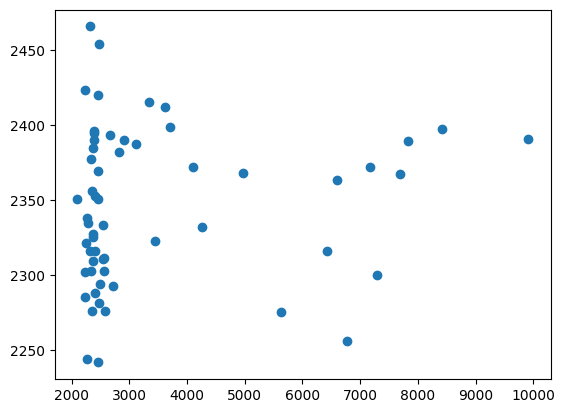

In [16]:
plt.scatter(y_test, predictions)

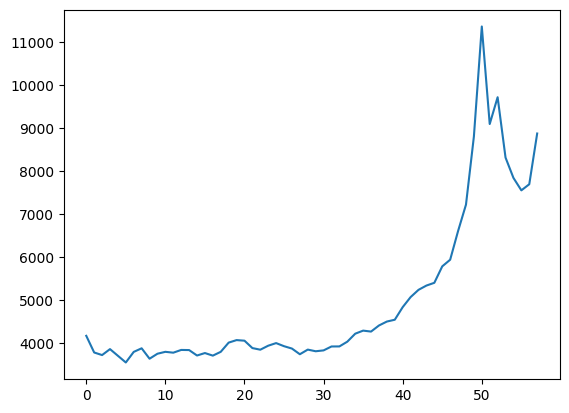

In [22]:
plt.plot(y_train+y_test)

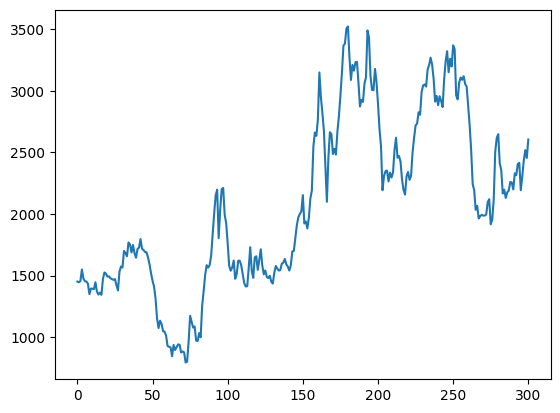

In [30]:
plt.plot(y_train)

In [24]:
raw_data = Path("__file__").parent / "data" /"Daily Prices_ICCO.csv"
raw_df = pd.read_csv(raw_data)
raw_df.head()

,Date,ICCO daily price (US$/tonne)
0,27/02/2025,"9,099.66"
1,26/02/2025,"9,089.95"
2,25/02/2025,"8,668.57"
3,24/02/2025,"8,408.72"
4,21/02/2025,"9,106.42"


In [ ]:
# convert ICCO daily price (US$/tonne) to number (currently string)
raw_df["ICCO daily price (US$/tonne)"] = raw_df["ICCO daily price (US$/tonne)"]..astype(float)

ValueError: could not convert string to float: '9,099.66'

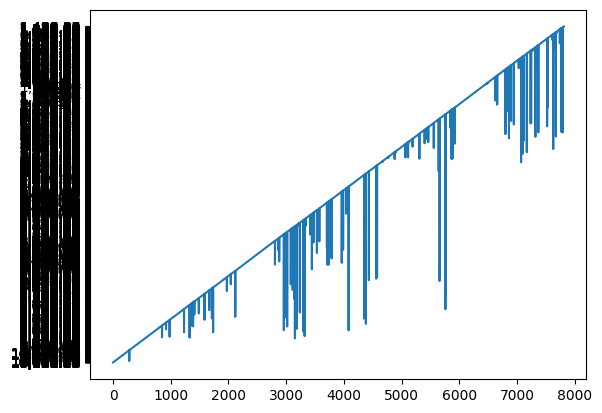

In [26]:
plt.plot(raw_df["ICCO daily price (US$/tonne)"])

In [27]:
raw_df["ICCO daily price (US$/tonne)"]

0       9,099.66
1       9,089.95
2       8,668.57
3       8,408.72
4       9,106.42
          ...   
7807    1,416.46
7808    1,430.32
7809    1,430.57
7810    1,462.28
7811    1,466.24
Name: ICCO daily price (US$/tonne), Length: 7812, dtype: object

'9,099.66'